## **　株価データ**
---
---


1. 対数収益率のデータ data/DJ30_OtoC.tsv を使って、df という名前の DataFrame を作成。また、終値のデータ data/DJ30_Close.tsv を使って、df_c という名前の DataFrame を作成。

2.  1. で作った df に対して、基本的な統計量を計算して、平均値と分散が異なっていることを確認する。

3.  1. で作った df を使って、各銘柄の対数収益率を標準化（平均が 0 で分散が 1）して、df_s という名前の DataFrame を作って下さい。そして、確かに標準化できていることも確認して下さい。

4.  3. で作った DataFrame から相関行列cm を作成して可視化して下さい。また、この結果からわかることを説明して下さい。

5. 相関行列の固有値を計算し、その分布をヒストグラムで可視化。

6. 最大固有値の固有ベクトルと、終値の DataFrame である df_c との、行列の積を計算。

7. ダウ・ジョーンズ工業株価平均指数（ダウ平均株価指数；DJ30 指数）について調べる。特に、計算方法について。また、DJ30 指数のデータを、^DJI というシンボルでダウンロードして pandas の DataFrame にまとめる

8.  6. と　7. の時系列データを、最初の日付の値で割って、matplotlib を使ってグラフで可視化。

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('/Users/shishishikakou/Downloads/データサイエンス特論/05/data/DJ30_OtoC.tsv',  delimiter='\t')
df.head()

,Date,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
0,2019-03-20,0.010310,-0.001986,-0.013362,0.003889,-0.006146,-0.002016,0.001879,-0.002803,-0.002905,...,0.002806,0.001107,-0.009300,-0.000098,-0.013388,-0.027289,-0.003830,0.002778,-0.013289,-0.005661
1,2019-03-21,0.026332,0.011320,0.016774,-0.003589,0.014274,0.022902,0.016072,0.007897,-0.013165,...,0.010300,0.025954,0.008788,0.011876,0.027846,0.011293,0.016046,0.012255,0.014252,0.008210
2,2019-03-22,-0.022206,-0.022561,-0.016580,-0.018114,-0.024510,-0.027242,-0.021942,-0.014197,-0.000924,...,-0.007506,-0.020715,-0.035968,-0.008034,0.007291,-0.013986,-0.012465,0.027139,-0.019360,-0.003048
3,2019-03-25,-0.014570,-0.000268,-0.002199,0.014848,0.013718,0.004049,0.000569,-0.000325,-0.006473,...,0.003406,0.009393,0.010378,0.002947,-0.001185,-0.002266,0.004388,0.007518,-0.010321,0.003776
4,2019-03-26,-0.025738,0.003832,-0.004465,-0.013942,-0.006427,-0.012655,0.000752,0.002904,0.015924,...,0.001931,-0.006003,-0.002994,0.005646,-0.004583,-0.015775,0.009901,0.005458,0.000969,-0.000407


In [57]:
basic_stats = df.describe()

# 平均値　
mean_values = basic_stats.loc['mean']
# 分散
variance_values = basic_stats.loc['std'] ** 2 

mean_values, variance_values


(AAPL    0.000940
 AMGN    0.000381
 AXP    -0.000430
 BA     -0.001664
 CAT     0.000458
 CRM    -0.000359
 CSCO    0.000137
 CVX    -0.000096
 DIS    -0.000937
 DOW    -0.000644
 GS      0.000334
 HD      0.000751
 HON    -0.000025
 IBM     0.000213
 INTC   -0.000294
 JNJ    -0.000019
 JPM    -0.000092
 KO     -0.000320
 MCD     0.000091
 MMM    -0.000874
 MRK    -0.000077
 MSFT    0.000254
 NKE    -0.000181
 PG      0.000531
 TRV     0.000168
 UNH     0.000349
 V      -0.000061
 VZ     -0.000174
 WBA    -0.000822
 WMT     0.000389
 Name: mean, dtype: float64,
 AAPL    0.000268
 AMGN    0.000191
 AXP     0.000308
 BA      0.000613
 CAT     0.000256
 CRM     0.000364
 CSCO    0.000191
 CVX     0.000286
 DIS     0.000260
 DOW     0.000361
 GS      0.000244
 HD      0.000215
 HON     0.000195
 IBM     0.000164
 INTC    0.000307
 JNJ     0.000114
 JPM     0.000204
 KO      0.000134
 MCD     0.000141
 MMM     0.000212
 MRK     0.000141
 MSFT    0.000226
 NKE     0.000237
 PG      0.000142

In [58]:
# 警告と潜在的なエラーを回避するために、統計を計算するために数値列のみを選択
# 「日付」列を除く
numerical_columns = df.select_dtypes(include=['number']).columns

# DataFrame の数値列の基本的な統計的尺度を計算する
df_stats_numerical = df[numerical_columns].describe()

# 各数値列の平均と分散を計算して違いを観察する
mean_values_numerical = df[numerical_columns].mean()
variance_values_numerical = df[numerical_columns].var()

df_stats_numerical, mean_values_numerical, variance_values_numerical

(             AAPL        AMGN         AXP          BA         CAT         CRM  \
 count  955.000000  955.000000  955.000000  955.000000  955.000000  955.000000   
 mean     0.000940    0.000381   -0.000430   -0.001664    0.000458   -0.000359   
 std      0.016382    0.013803    0.017554    0.024758    0.016009    0.019067   
 min     -0.075347   -0.054981   -0.089185   -0.164957   -0.082236   -0.075635   
 25%     -0.007655   -0.007575   -0.008970   -0.014203   -0.009094   -0.010519   
 50%      0.001173   -0.000311    0.000198   -0.001366    0.000613    0.000382   
 75%      0.010879    0.006859    0.008789    0.011398    0.009256    0.010379   
 max      0.064465    0.079938    0.133990    0.106803    0.063181    0.100591   
 
              CSCO         CVX         DIS         DOW  ...         MRK  \
 count  955.000000  955.000000  955.000000  955.000000  ...  955.000000   
 mean     0.000137   -0.000096   -0.000937   -0.000644  ...   -0.000077   
 std      0.013834    0.016910    0

In [59]:
# DataFrame 内の各銘柄のログの戻り値を標準化する
# 標準化の公式: Z = (X - 平均) / std
df_s = (df[numerical_columns] - mean_values_numerical) / df[numerical_columns].std()

# DataFrame の数値列の基本的な統計指標の計算
df_s_stats = df_s.describe()

# 標準化されたデータフレームの各列の平均と分散を計算する
#
mean_values_s = df_s.mean()
variance_values_s = df_s.var()

df_s_stats

# 平均値（mean_values_s）はほぼゼロに近い値、分散（variance_values_s）は1になっている


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
count,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,955.000000,9.550000e+02,9.550000e+02,9.550000e+02,...,955.000000,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02,955.000000,9.550000e+02,9.550000e+02,9.550000e+02,9.550000e+02
mean,-9.300298e-18,1.488048e-17,-3.720119e-18,-2.976095e-17,-1.860060e-18,1.023033e-17,0.000000,-7.440238e-18,-1.488048e-17,-1.209039e-17,...,0.000000,2.743588e-17,-8.370268e-18,-1.116036e-17,5.580179e-18,0.000000,-5.580179e-18,-7.440238e-18,2.232071e-17,-2.790089e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.656676e+00,-4.010732e+00,-5.056007e+00,-6.595618e+00,-5.165426e+00,-3.947889e+00,-5.306586,-1.091004e+01,-6.771946e+00,-6.783230e+00,...,-4.772078,-4.082926e+00,-3.783660e+00,-5.441380e+00,-9.309267e+00,-5.027967,-4.098057e+00,-4.005347e+00,-4.433281e+00,-4.423083e+00
25%,-5.246640e-01,-5.763586e-01,-4.865129e-01,-5.064651e-01,-5.966718e-01,-5.328427e-01,-0.522561,-4.863435e-01,-5.446598e-01,-5.222184e-01,...,-0.571002,-5.195700e-01,-5.616221e-01,-4.950943e-01,-5.203001e-01,-0.544143,-5.159209e-01,-4.963364e-01,-5.335538e-01,-5.467253e-01
50%,1.423521e-02,-5.008434e-02,3.576678e-02,1.203278e-02,9.668252e-03,3.885365e-02,0.020700,-1.496037e-03,-8.381398e-03,-4.104061e-02,...,0.006531,3.464946e-02,1.173110e-02,4.367666e-02,1.961585e-02,-0.004320,2.208611e-02,3.319726e-02,2.138831e-02,-3.801100e-02
75%,6.066716e-01,4.693334e-01,5.251526e-01,5.276065e-01,5.495381e-01,5.631463e-01,0.535071,5.050775e-01,5.522193e-01,5.716162e-01,...,0.582906,5.961546e-01,5.837009e-01,5.151240e-01,5.082251e-01,0.532855,5.387680e-01,5.237931e-01,4.976299e-01,4.851666e-01
max,3.877633e+00,5.763631e+00,7.657356e+00,4.381145e+00,3.917977e+00,5.294362e+00,6.848607,4.910874e+00,4.759335e+00,3.811621e+00,...,6.428504,5.169848e+00,6.254408e+00,5.720132e+00,6.744649e+00,5.405871,4.740737e+00,7.325280e+00,6.000784e+00,6.110331e+00


In [60]:
mean_values_s, variance_values_s

(AAPL   -9.300298e-18
 AMGN    1.488048e-17
 AXP    -3.720119e-18
 BA     -2.976095e-17
 CAT    -1.860060e-18
 CRM     1.023033e-17
 CSCO    0.000000e+00
 CVX    -7.440238e-18
 DIS    -1.488048e-17
 DOW    -1.209039e-17
 GS      8.370268e-18
 HD     -1.860060e-18
 HON    -4.650149e-18
 IBM     9.300298e-18
 INTC    0.000000e+00
 JNJ    -1.860060e-18
 JPM     2.604083e-17
 KO      7.440238e-18
 MCD     2.557582e-18
 MMM     9.300298e-19
 MRK     0.000000e+00
 MSFT    2.743588e-17
 NKE    -8.370268e-18
 PG     -1.116036e-17
 TRV     5.580179e-18
 UNH     0.000000e+00
 V      -5.580179e-18
 VZ     -7.440238e-18
 WBA     2.232071e-17
 WMT    -2.790089e-18
 dtype: float64,
 AAPL    1.0
 AMGN    1.0
 AXP     1.0
 BA      1.0
 CAT     1.0
 CRM     1.0
 CSCO    1.0
 CVX     1.0
 DIS     1.0
 DOW     1.0
 GS      1.0
 HD      1.0
 HON     1.0
 IBM     1.0
 INTC    1.0
 JNJ     1.0
 JPM     1.0
 KO      1.0
 MCD     1.0
 MMM     1.0
 MRK     1.0
 MSFT    1.0
 NKE     1.0
 PG      1.0
 TRV     1.

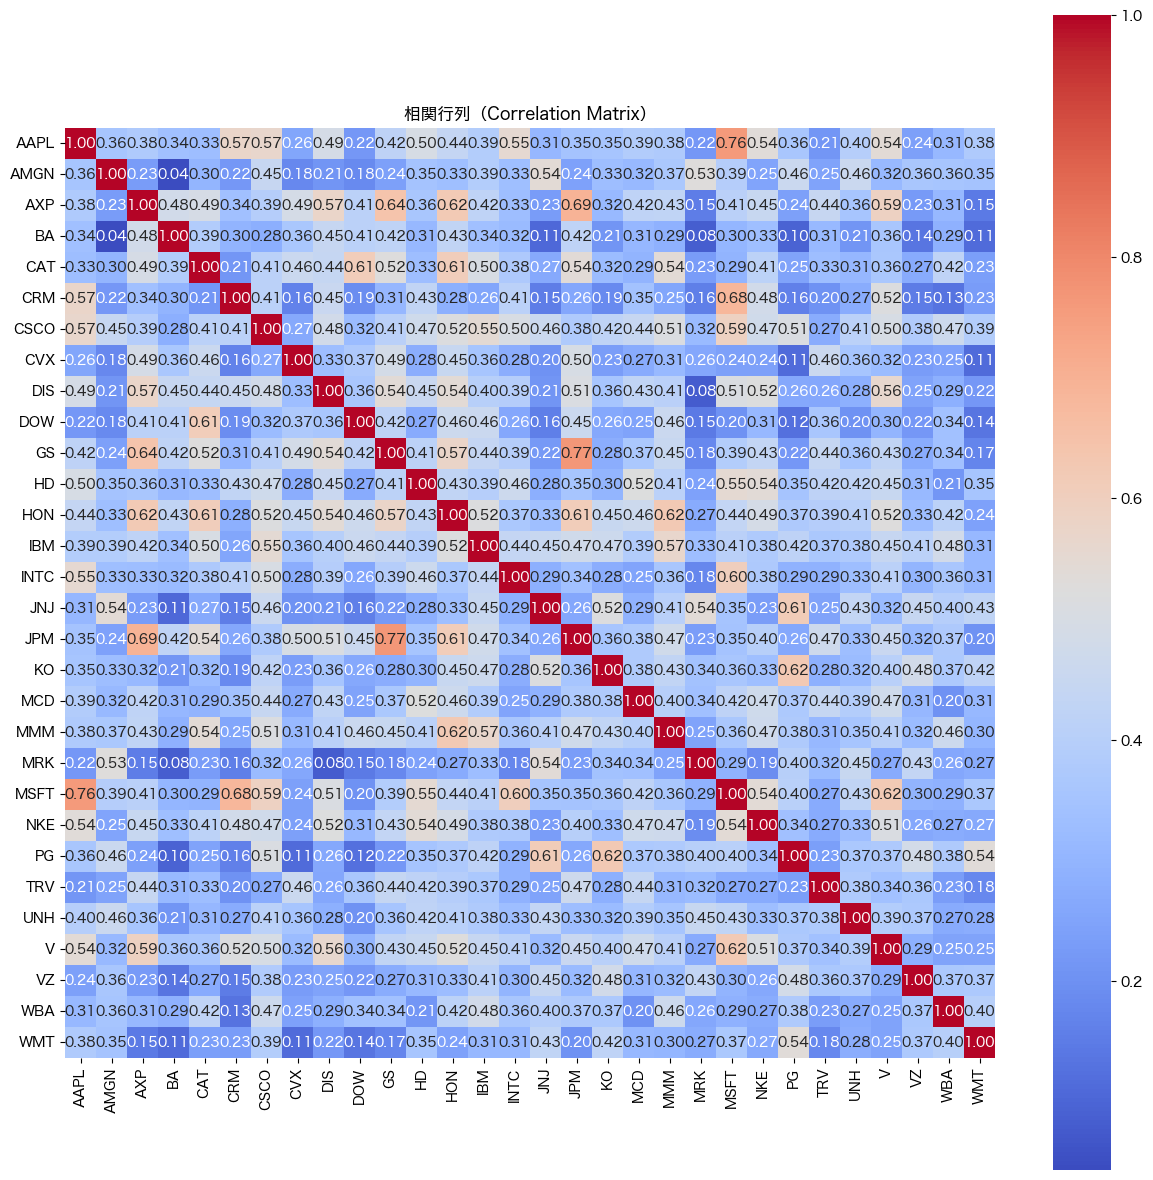

In [61]:
# 相関行列（Correlation Matrix）を計算
cm = df_s.corr()

# 相関行列を可視化
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('相関行列（Correlation Matrix）')
plt.show()


### この結果からわかること：

高い正の相関: 同じ産業に属する企（値が1に近いペア）は、一方が上がるともう一方も上がる傾向がある

低いまたは負の相関: 異なる産業に属する企業（値が0または負のペア）は、一方が上がってももう一方が必ずしも上がるわけではない、または逆の動きをする可能性がある

対角線の値: 対角線上の値はすべて1です。これは自分自身との相関が1であるため。

対称性: 相関行列は対称であるため、左下の三角形部分だけでも全体の情報がわかる。

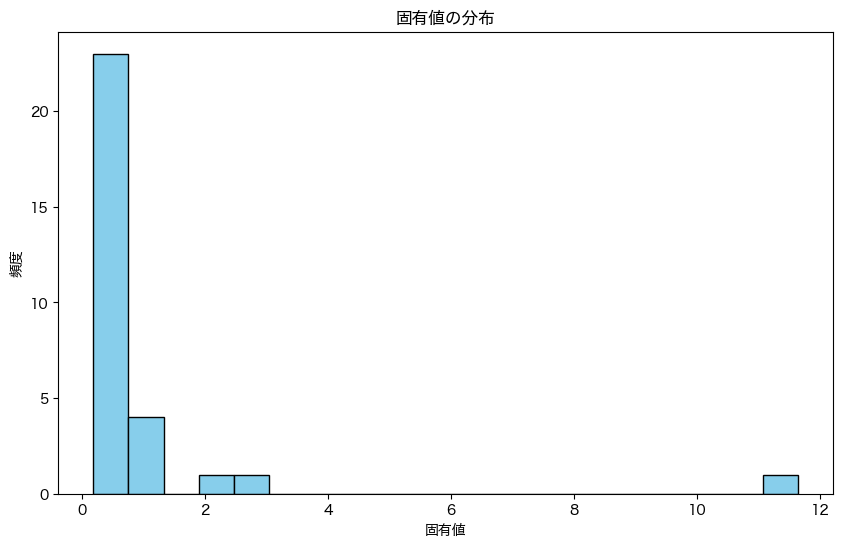

array([11.64255227,  2.64316165,  2.04369718,  1.30341402,  1.02464948,
        0.85415087,  0.86292676,  0.72681054,  0.65815758,  0.18543477,
        0.20675794,  0.60884226,  0.59949174,  0.24250808,  0.56507544,
        0.26815745,  0.28168084,  0.51935739,  0.30571599,  0.31916176,
        0.33123082,  0.34879482,  0.36744616,  0.49267943,  0.48169265,
        0.39204447,  0.43336354,  0.41500581,  0.42010819,  0.45593008])

In [62]:
# 相関行列の固有値を計算
eigenvalues, _ = np.linalg.eig(cm.to_numpy())

# 固有値の分布をヒストグラムで可視化
plt.figure(figsize=(10, 6))
plt.hist(eigenvalues, bins=20, color='skyblue', edgecolor='black')
plt.title('固有値の分布')
plt.xlabel('固有値')
plt.ylabel('頻度')
plt.show()

# 固有値を返す
eigenvalues

### 考察

主成分の存在: 固有値が非常に大きい（11.6程度）1つの主成分が存在する。
この主成分がデータセットの大部分の情報をキャプチャしている可能性が高いです。

次の重要な成分: それ以外にも、固有値が2以上の成分が少数存在する。これらもまた、データの変動を理解する上で重要な要素。
低い固有値: 固有値が低い成分も多数あり、これらはデータの変動をあまり説明していない可能性がある。

このような固有値の分布は、データの次元削減（例：PCA）を考える際に有用です。大きな固有値を持つ成分は、データセットにおける主要な変動を捉えているため、これらの成分を用いて次元削減を行うことが一般的です。

また、1つまたは数つの主成分が非常に強い場合、それはマーケット全体に影響を与える共通の要因（例えば、経済指標や政策など）が存在する可能性を示唆しています。

### 6. 最大固有値の固有ベクトルと、終値の DataFrame である df_c との、行列の積を計算して下さい。

In [63]:
df_c = pd.read_csv('/Users/shishishikakou/Downloads/データサイエンス特論/05/data/DJ30_Close.tsv', delimiter='\t')

df_c.head()


,Date,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
0,2019-03-20,47.040001,191.119995,110.769997,376.160004,133.009995,163.509995,53.259998,124.690002,109.989998,...,78.320610,117.519997,86.690002,101.720001,131.330002,250.500000,153.750000,57.669998,62.790001,98.639999
1,2019-03-21,48.772499,191.889999,111.820000,372.700012,134.059998,166.949997,53.939999,125.860001,108.660004,...,79.150764,120.220001,88.010002,102.489998,134.369995,252.020004,155.800003,58.290001,63.599998,99.059998
2,2019-03-22,47.762501,186.699997,109.459999,362.170013,129.770004,161.500000,52.740002,123.089996,108.230003,...,78.520988,117.050003,82.190002,101.660004,134.899994,247.089996,153.070007,59.759998,62.410000,98.279999
3,2019-03-25,47.185001,186.589996,109.040001,370.459991,131.380005,160.880005,52.730000,122.889999,107.790001,...,78.578247,117.660004,82.330002,101.959999,134.949997,246.860001,153.029999,60.080002,61.689999,98.169998
4,2019-03-26,46.697498,188.270004,109.500000,370.380005,131.839996,159.399994,53.230000,124.129997,110.139999,...,79.122139,117.910004,83.379997,103.019997,134.979996,243.389999,155.300003,60.630001,61.919998,98.320000


In [64]:
# 最大固有値に対応する固有ベクトルを求める
max_eigenvalue_index = np.argmax(eigenvalues)
_, eigenvectors = np.linalg.eig(cm.to_numpy())
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

# 最大固有値に対応する固有ベクトルを表示
max_eigenvector


array([-0.19999523, -0.15943959, -0.20189182, -0.14890201, -0.19117084,
       -0.15470428, -0.2156058 , -0.15372436, -0.19708342, -0.15539778,
       -0.20096211, -0.19307216, -0.22303034, -0.20753155, -0.18034286,
       -0.16456306, -0.20345518, -0.17808723, -0.18368972, -0.20222494,
       -0.13538502, -0.20899609, -0.19396266, -0.17086387, -0.16103628,
       -0.17532425, -0.20762199, -0.15684038, -0.1635594 , -0.14242037])

In [65]:
# 'Date'列を除いて、数値データ部分のみを取り出す
df_c_numerical = df_c.drop(columns=['Date'])

# 最大固有値に対応する固有ベクトルとdf_cの行列の積を計算
result_matrix_product = np.dot(df_c_numerical, max_eigenvector)

# 計算結果を表示
result_matrix_product[:10]  # 最初の10行だけ表示して確認


array([-704.06641272, -709.5480265 , -696.27614345, -696.83767664,
       -701.00095637, -699.14733778, -702.06634934, -708.0181197 ,
       -717.20013956, -715.11308593])

In [66]:
import yfinance as yf

In [85]:
# ダウンロードしたい株価データの銘柄シンボルを指定
symbol = "^DJI"  

# ダウンロードしたい期間を指定します（開始日と終了日）
start_date = "2019-01-01"
end_date = "2022-12-31"

# Yahoo Financeから株価データをダウンロード
data = yf.download(symbol, start=start_date, end=end_date)

# ダウンロードしたデータを表示
df = pd.DataFrame(data)
df = df.drop('Adj Close', axis=1)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,23058.609375,23413.470703,22928.589844,23346.240234,321570000
2019-01-03,23176.390625,23176.390625,22638.410156,22686.220703,424240000
2019-01-04,22894.919922,23518.640625,22894.919922,23433.160156,396020000
2019-01-07,23474.259766,23687.740234,23301.589844,23531.349609,334200000
2019-01-08,23680.320312,23864.650391,23581.449219,23787.449219,317420000
...,...,...,...,...,...
2022-12-23,32961.058594,33226.140625,32814.019531,33203.929688,221050000
2022-12-27,33224.230469,33387.718750,33069.578125,33241.558594,246010000
2022-12-28,33264.761719,33379.550781,32869.148438,32875.710938,252260000


In [86]:
# データをCSV形式で保存
#df.to_csv('DJI_data.csv')

# TSV形式で保存
df.to_csv('/Users/shishishikakou/Downloads/データサイエンス特論/05/data/DJI_data.tsv', sep='\t')

In [81]:
df_dji = pd.read_csv('/Users/shishishikakou/Downloads/データサイエンス特論/05/data/DJI_data.tsv', delimiter='\t')
df_dji.head()


,Date,Open,High,Low,Close,Volume
0,2019-01-02,23058.609375,23413.470703,22928.589844,23346.240234,321570000
1,2019-01-03,23176.390625,23176.390625,22638.410156,22686.220703,424240000
2,2019-01-04,22894.919922,23518.640625,22894.919922,23433.160156,396020000
3,2019-01-07,23474.259766,23687.740234,23301.589844,23531.349609,334200000
4,2019-01-08,23680.320312,23864.650391,23581.449219,23787.449219,317420000


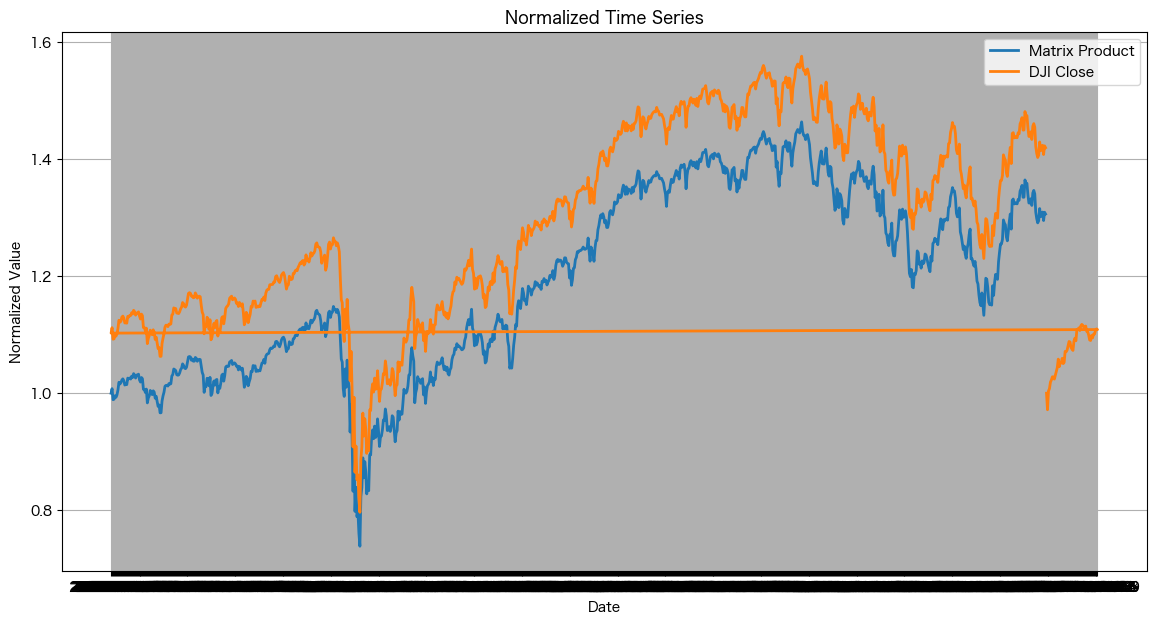

In [79]:
# 再度対数収益率データ（df）を読み込む
df = pd.read_csv('/Users/shishishikakou/Downloads/データサイエンス特論/05/data/DJ30_OtoC.tsv', delimiter='\t')

# 対数収益率を標準化
# 数値でない列を除外して、対数収益率を標準化
# 数値列だけを取得
numeric_df = df.select_dtypes(include=[np.number])

# 数値列に対してのみ平均と標準偏差を計算
df_s = (numeric_df - numeric_df.mean()) / numeric_df.std()



# 相関行列（cm）を計算
cm = df_s.corr()

# 固有値（eigenvalues）を計算
eigenvalues, eigenvectors = np.linalg.eig(cm.to_numpy())
max_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]

# 行列の積（result_matrix_product）を計算
result_matrix_product = np.dot(df_c_numerical, max_eigenvector)

# 最初の日付の値で正規化
normalized_matrix_product = result_matrix_product / result_matrix_product[0]

# DJIのClose時系列データを最初の日付の値で割る
normalized_dji_close = df_dji['Close'] / df_dji['Close'].iloc[0]

# matplotlibを使ってグラフで可視化
# Matrix Product: 各銘柄の対数収益率とその相関行列の最大固有ベクトルとの行列の積
# DJI Close: ダウ・ジョーンズ工業平均株価（DJI）の終値
plt.figure(figsize=(14, 7))
plt.plot(df_c['Date'], normalized_matrix_product, label='Matrix Product', linewidth=2)  # 行列の積の正規化したデータをプロット
plt.plot(df_dji['Date'], normalized_dji_close, label='DJI Close', linewidth=2)  # DJIのCloseの正規化したデータをプロット
plt.xlabel('Date')  # x軸のラベル
plt.ylabel('Normalized Value')  # y軸のラベル
plt.title('Normalized Time Series')  # グラフのタイトル
plt.legend()  # 凡例を表示
plt.grid(True)  # グリッドを表示
plt.show()


## 考察

Matrix Product と DJI Close の動きは大まかには似ている。
これは、選択した企業群の対数収益率の相関構造が、DJIと同じような市場の動きを反映している可能性を示していると考える。
ただし、一部で乖離が見られる場所もあり、これは各企業群が市場全体（DJI）と完全に一致しない特有の動きも持っていることを示している可能性がある。